<a name="0"></a>
## Genetic Algorithms 

<a name="0.1"></a>
### Task:
A van in a shop must be filled to transport household appliances, its load must be optimized by maximizing the value of what is transported for a given volume. 

<a name="0.2"></a>
### Solution Overview:
The primary challenge encountered in the project was the development of an effective fitness_func. The initial approach involved returning a tuple comprising two distinct elements: fitness_value and fitness_space. However, this strategy proved to be suboptimal due to the significant disparity in their respective ranges, which led the optimization algorithm to predominantly focus on the fitness_value, thus neglecting the fitness_space.

To address this, the logarithmic function was employed to normalize the ranges, thereby enabling the algorithm to concurrently optimize both fitness metrics. Further refinements included adjusting the parameters for pygad.GA(). A notable issue was the occurrence of errors when both fitness values were zero. To mitigate this, a small constant was introduced to prevent zero values.

Although my expertise in Genetic Algorithms (GA) is still developing, the implemented solution appears to be functioning effectively. Continuous learning and experimentation are anticipated to enhance the robustness of the solution further.


In [3]:
import numpy as np 
import pandas as pd
import pygad

In [105]:
free_space = 5

df = pd.read_excel("products.xlsx")
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Product,Refrigerator A,Cell phone,TV 55,TV 50,TV 42,Notebook A,Ventilator,Microwave A,Microwave B,Microwave C,Refrigerator B,Refrigerator C,Notebook B,Notebook C
Space,0.751,0.000009,0.4,0.29,0.2,0.0035,0.496,0.0424,0.0544,0.0319,0.635,0.87,0.498,0.527
Price,999.9,2199.12,4346.99,3999.9,2999.0,2499.9,199.9,308.66,429.9,299.29,849.0,1199.89,1999.0,3999.0
Quantity,3,2,5,5,5,4,12,7,7,9,4,2,6,6


In [106]:
function_inputs_space = []
function_inputs_value = []
gene_space = []
for index, item in df.iterrows():
    function_inputs_space.append(item.Space)
    function_inputs_value.append(item.Price)
    gene_space.append([0,item.Quantity])

desired_output = free_space

In [107]:
def fitness_func(ga_instance, solution, solution_idx):
    total_space = np.sum(solution*function_inputs_space)
    if (total_space > desired_output):
        fitness_space = 0.000001
        fitness_value = 0.000001 
    else:
        fitness_value = np.log1p(np.sum(solution*function_inputs_value)) + 1
        fitness_space = np.log1p(1.0 / (np.abs(total_space - desired_output) + 0.000001)) + 1 
    return [fitness_space, fitness_value]

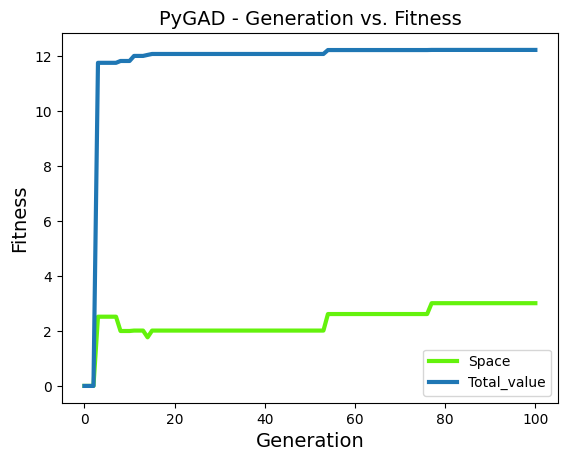

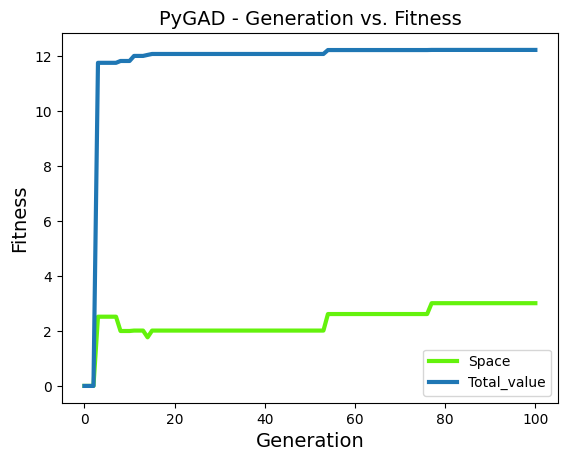

In [108]:
num_generations = 100
num_parents_mating = 5

sol_per_pop = 20
num_genes = len(gene_space)

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_type=int,
                       gene_space=gene_space,
                       mutation_type="random",
                       fitness_func=fitness_func,
                       parent_selection_type='rws')

ga_instance.run()

ga_instance.plot_fitness(label=['Space', 'Total_value'])

In [109]:
ga_instance.best_solution()

(array([0, 2, 5, 5, 5, 4, 0, 0, 7, 0, 0, 0, 0, 0]),
 array([ 3.00740887, 12.21367797]),
 0)

In [110]:
solution = ga_instance.best_solution()[0]
print(np.sum(solution*function_inputs_space))
print(np.sum(solution*function_inputs_value))

4.84481798
74136.59
